In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import  ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [3]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

2022-11-13 03:56:43.727225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:56:43.840996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:56:43.841791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:56:43.844183: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

2022-11-13 03:56:43.844510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:56:43.845487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:56:43.847864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:56:46.427386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:56:46.428259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                            rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True)

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory('../input/isthisme/IsThisMe/Train',
                                 target_size = (150, 150),
                                 batch_size = 32,
                                 class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory('../input/isthisme/IsThisMe/Validation',
                                 target_size = (150, 150),
                                 batch_size = 32,
                                 class_mode = 'binary')

Found 700 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [7]:
checkpoint = ModelCheckpoint('modelo_is_this_me.hdf5', monitor = 'val_accuracy', verbose = 1, save_best_only = True)

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(),
             metrics = ['accuracy'])

In [9]:
hist = model.fit(train_generator, steps_per_epoch = 700 // 32,
         epochs = 50,
         validation_data = validation_generator,
         validation_steps = 200//32,
         callbacks = [checkpoint])

2022-11-13 03:56:50.089721: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-11-13 03:56:53.864311: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


21/21 [==============================] - 86s 4s/step - loss: 0.7135 - accuracy: 0.5509 - val_loss: 0.6754 - val_accuracy: 0.5625

Epoch 00001: val_accuracy improved from -inf to 0.56250, saving model to modelo_is_this_me.hdf5
Epoch 2/50
21/21 [==============================] - 67s 3s/step - loss: 0.6279 - accuracy: 0.6527 - val_loss: 0.5629 - val_accuracy: 0.7344

Epoch 00002: val_accuracy improved from 0.56250 to 0.73438, saving model to modelo_is_this_me.hdf5
Epoch 3/50
21/21 [==============================] - 67s 3s/step - loss: 0.5992 - accuracy: 0.6901 - val_loss: 0.4811 - val_accuracy: 0.7969

Epoch 00003: val_accuracy improved from 0.73438 to 0.79688, saving model to modelo_is_this_me.hdf5
Epoch 4/50
21/21 [==============================] - 66s 3s/step - loss: 0.4509 - accuracy: 0.7919 - val_loss: 0.3132 - val_accuracy: 0.8802

Epoch 00004: val_accuracy improved from 0.79688 to 0.88021, saving model to modelo_is_this_me.hdf5
Epoch 5/50
21/21 [==============================] - 68

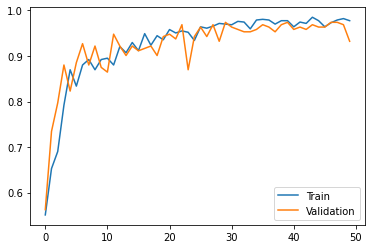

In [10]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

In [49]:
test_generator = train_datagen.flow_from_directory('../input/isthisme/IsThisMe/Test',
                                 target_size = (150, 150),
                                 batch_size = 64,
                                 class_mode = 'binary')


Found 200 images belonging to 2 classes.


In [12]:
model_2 = model

In [13]:
model.load_weights('./modelo_is_this_me.hdf5')

In [14]:
model.evaluate(test_generator)

7/7 [==============================] - 20s 3s/step - loss: 0.2708 - accuracy: 0.9200


[0.27078285813331604, 0.9200000166893005]

In [37]:
img = test_generator[0][0][1]
img = img.reshape((1,)+img.shape)
print(img.shape)

(1, 150, 150, 3)


In [38]:
model.predict(img)

array([[3.3149547e-05]], dtype=float32)

In [43]:
def prediction (img):
    img = img.reshape((1,)+img.shape)
    pred = model.predict(img) 
    if pred <= 0.5:
        label = 'No soy yo'
    else: 
        label = 'Soy yo'
        
    return label
    


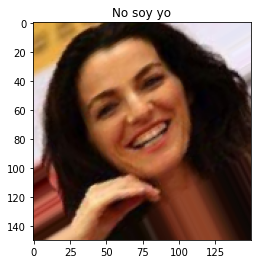

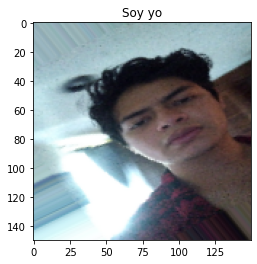

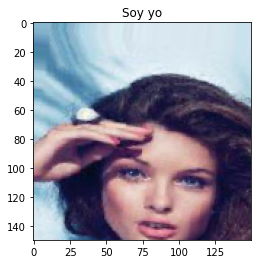

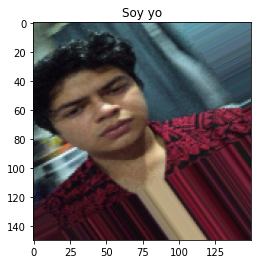

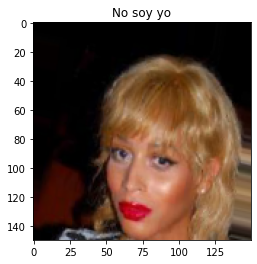

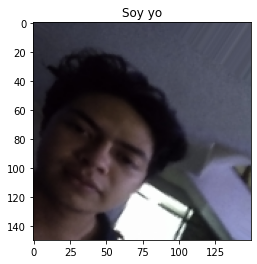

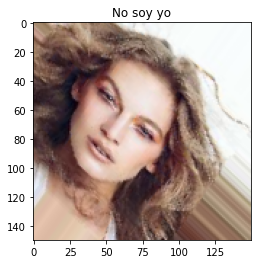

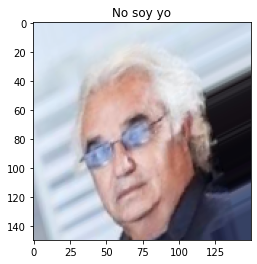

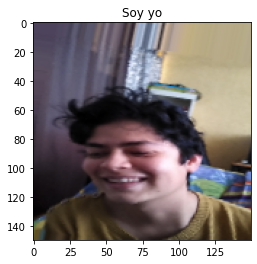

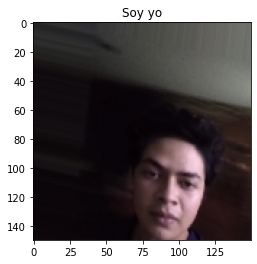

In [50]:
for i in range(10):
    plt.figure(i)
    img = test_generator[0][0][i]
    label = prediction(img)
    img = array_to_img(img)
    plt.title(label)
    plt.imshow(img)
plt.show()